<a href="https://colab.research.google.com/github/CharleXu/Awesome-Linux-Software/blob/master/6080_Project_V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the classification


## Summary

### Objectives:
For this project, we want to use the machine learning model to predict the classification to replace the job finished by analyst before.


## Content



<a href="#Part 1: DataExploration">[Part 1: Data Exploration]
  
<a href="#Part-2:-Feature-Preprocessing">[Part 2: Feature Preprocessing]
  
<a href="#Part-3:-Model-Training-and-Result-Evaluation">[Part 3: Model Training and Results Evaluation]

<a href="#Part-4:-Feature-Selection">[Part 4: Feature Selection]



## Workflow
![workflow](https://raw.githubusercontent.com/amueller/ml-workshop-2-of-4/master/slides/images/gridsearch_workflow.png )

# Part 0: Load the data set

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# load the alert dataset
file_id='1MjqZCt49ttsJBmKPjYZI-1T5BFrF7JXa'
link='https://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)
my_data = pd.read_csv(csv_url)

# load the demographic dataset
file_id2 ='1rQwrS3iYEw1W92jlpMvpR-MYQyRuN93m'
csv_url2 = link.format(FILE_ID=file_id2)
demographic = pd.read_csv(csv_url2)

data description

# Part 1: Data Exploration

### Part 1.1: Understand the Raw Dataset

In [2]:
import warnings
warnings.filterwarnings('ignore')

import imblearn
# will show all the columns
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [3]:
print('total number of rows in alert dataset: %d' % my_data.shape[0])
print('total number of rows in demographic dataset: %d' % demographic.shape[0])

total number of rows in alert dataset: 127710
total number of rows in demographic dataset: 1374


In [4]:
my_data.head()

,type_name,alert_escalation_date,alert_id_fk,insert_date,score,status,resolution,owner_name,malicious,employee_id,risk_factor,avg_score,classification,HRU,indicators,indicator_pairs,alert_category,alert_type,grouping,indicator_heat_score
0,TP,3/26/2018 20:18,319529787,9/29/2017,180,cleared,closed,Senior_Analyst_1,yes,2313834724,1.800,100.000,TP/DE,None,App_1_Box_Aged_Files,App_1_Box_Aged_Files,Heat,Daily_Heat,App_1,3.000
1,TP,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,1.720,100.000,TP/DE,HRU11,App_1_Box_Aged_Files,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Heat,Daily_Heat,App_1,3.000
2,TP,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,1.720,100.000,TP/DE,HRU11,App_4_Request_Volume_30day,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Heat,Daily_Heat,App_4,4.000
3,TP,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,1.720,100.000,TP/DE,HRU11,App_4_Request_Volume_90day,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Heat,Daily_Heat,App_4,3.000
4,TP,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,1.720,100.000,TP/DE,HRU11,App_14_Threshold_1,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Heat,Daily_Heat,App_14,3.000


In [5]:
demographic.head()

,employee_id,Person_Type,GE_Hire_Date,State_Name,Country_Name,COUNTRY_CODE,Business_Segment,Sub_Business,Function,Function_Group,Org_Name,Career_Band,JOB_TITLE,JOB_TYPE
0,7296648307,Employee,6/27/2010 0:00,Dubai,United Arab Emirates,AE,Aviation Commercial Engines,AVI CEO-Customer & Product Support,Engineering/Technology,Production,AVI CEO-CPS-Commercial Field Service,SPB,No_Data,Sr Engineering Manager 2 - Fleet Management
1,9526104533,Ex-employee,11/8/2010 0:00,Karnataka,India,IN,Aviation Digital,AVI DIG-Digital Service Solutions,Digital Technology,Enabling,AVI DIG-DSS-India,SPB,No_Data,Sr Staff Data Scientist
2,3655799847,Employee,8/27/2007 0:00,Masovian,Poland,PL,Aviation Engineering,AVI ENG-Engineering Design Center Poland,Engineering/Technology,Production,AVI ENG-EDC-Engineering Material Systems,SPB,No_Data,Sr Scientist CTH 3 - Materials Science and Eng...
3,9672758310,Employee,4/22/1996 0:00,Ohio,United States,US,Aviation Engineering,AVI ENG-Engineering Material Systems,Engineering/Technology,Production,AVI ENG-Engineering Material Systems,SPB,No_Data,Sr Scientist 1 - Materials Science and Enginee...
4,13558590425,Employee,2/3/1997 0:00,Ohio,United States,US,Aviation Engineering,AVI ENG-Chief Engineer,Engineering/Technology,Production,AVI ENG-CE-General Electric Aviation Engines,SPB,No_Data,Sr Engineer CTH 0 - Chief Engineering


#### drop the meaningless columns

In [6]:
# Drop the features that assigned by data scientist
df_indicator = my_data['indicators'].copy()
assign_ds = ['type_name', 'indicators', 'alert_category', 'grouping','indicator_heat_score']
my_data = my_data.drop(assign_ds, axis=1)
print('Alert dataset:', '\n', "Dataset size: %d  number of features: %d  number of classes: %d"
      % (my_data.shape[0], my_data.shape[1], len(np.unique(my_data['classification']))))

Alert dataset: 
 Dataset size: 127710  number of features: 15  number of classes: 4


In [7]:
no_mean = ['Person_Type', 'GE_Hire_Date',
       'Country_Name', 'Sub_Business','Function', 'Org_Name',  
       'JOB_TITLE','JOB_TYPE']
demographic = demographic.drop(no_mean, axis=1)
print('Demographic dataset:', '\n',"Dataset size: %d  number of features: %d"
      % (demographic.shape[0], demographic.shape[1]))

Demographic dataset: 
 Dataset size: 1374  number of features: 6


In [8]:
# Check the duplicated data
my_data_dup = my_data[my_data.duplicated(keep='first')]
print('The number of duplicated data is: %d' % my_data_dup.shape[0])
demographic_dup = demographic[demographic.duplicated(keep='first')]
print('The number of duplicated data in demographic is: %d' % demographic_dup.shape[0])

The number of duplicated data is: 27239
The number of duplicated data in demographic is: 0


In [9]:
# Remove the duplicated data
my_data = my_data.drop_duplicates()
print('All duplicated data have been dropped')
print('The total number of rows: %d' % my_data.shape[0])

All duplicated data have been dropped
The total number of rows: 100471


In [10]:
new_data = pd.merge(my_data, demographic, on = 'employee_id')
new_data.head()

,alert_escalation_date,alert_id_fk,insert_date,score,status,resolution,owner_name,malicious,employee_id,risk_factor,avg_score,classification,HRU,indicator_pairs,alert_type,State_Name,COUNTRY_CODE,Business_Segment,Function_Group,Career_Band
0,3/26/2018 20:18,319529787,9/29/2017,180,cleared,closed,Senior_Analyst_1,yes,2313834724,1.800,100.000,TP/DE,None,App_1_Box_Aged_Files,Daily_Heat,Ohio,US,Aviation Supply Chain,Production,SPB
1,3/26/2018 20:18,1393818439,9/29/2017,195,cleared,closed,Senior_Analyst_1,yes,2313834724,1.950,100.000,TP/DE,None,App_1_Box_Aged_Files,Daily_Heat,Ohio,US,Aviation Supply Chain,Production,SPB
2,3/26/2018 20:18,625554667,9/29/2017,174,cleared,closed,Senior_Analyst_1,yes,2313834724,1.740,100.000,TP/DE,None,App_1_Box_Aged_Files,Daily_Heat,Ohio,US,Aviation Supply Chain,Production,SPB
3,3/26/2018 20:18,1633242574,9/29/2017,172,cleared,closed,Senior_Analyst_1,yes,13152813815,1.720,100.000,TP/DE,HRU11,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Daily_Heat,Ohio,US,Aviation Engineering,Production,LPB
4,3/26/2018 20:21,1025069746,10/19/2017,256,cleared,closed,Senior_Analyst_1,yes,13152813815,2.560,100.000,TP/DE,HRU11,App_1_Box_Aged_Files/App_4_Request_Volume_30da...,Daily_Heat,Ohio,US,Aviation Engineering,Production,LPB


### Part 1.2: Data cleaning

Find the missing value

In [11]:
new_data.isna().sum()[new_data.isna().sum() != 0]

risk_factor    83306
avg_score      83306
dtype: int64

In [12]:
new_data.alert_type.value_counts()

Atomic          83306
Daily_Heat       6067
Monthly_Heat     5544
Weekly_Heat      4546
Name: alert_type, dtype: int64

As looking through the dataset, the avg_score and risk_factor will be NA for atomic alerts (alert_type), so we can ues minimal value to fill those missing values

In [13]:
temp = my_data.loc[my_data['alert_type']!='Atomic']
for i in ['risk_factor', 'avg_score']:
  print(temp[i].describe(), '\n')

count   16914.000
mean        9.990
std        12.473
min         1.700
25%         2.927
50%         7.931
75%        11.567
max       629.645
Name: risk_factor, dtype: float64 

count    16914.000
mean       407.927
std       1777.487
min         90.000
25%        100.000
50%        110.000
75%        245.000
max     113727.000
Name: avg_score, dtype: float64 



In [0]:
#fill the risk_factor and avg_score with min of each feature
new_data[['risk_factor']] = new_data[['risk_factor']].fillna(1.7)
new_data[['avg_score']] = new_data[['avg_score']].fillna(90)

In [15]:
print('Dataset:', '\n', "Dataset size: %d  number of features: %d  number of classes: %d"
      % (new_data.shape[0], new_data.shape[1], len(np.unique(new_data['classification']))))

Dataset: 
 Dataset size: 99463  number of features: 20  number of classes: 4


### Part 1.3:  Understand the features

#### Understand the numerical features

In [16]:
# Understand the numerical feature
print(my_data[['score', 'risk_factor', 'avg_score']].describe(percentiles = [.1, .25, .5, .75, .95]))

            score  risk_factor  avg_score
count  100471.000    16915.000  16915.000
mean      698.643        9.990    407.903
std      8622.462       12.473   1777.437
min         3.000        1.700      5.000
10%        10.000        2.000     90.000
25%        10.000        2.926    100.000
50%        10.000        7.930    110.000
75%        10.000       11.567    245.000
95%      1890.000       29.762   1178.000
max   1147968.000      629.645 113727.000


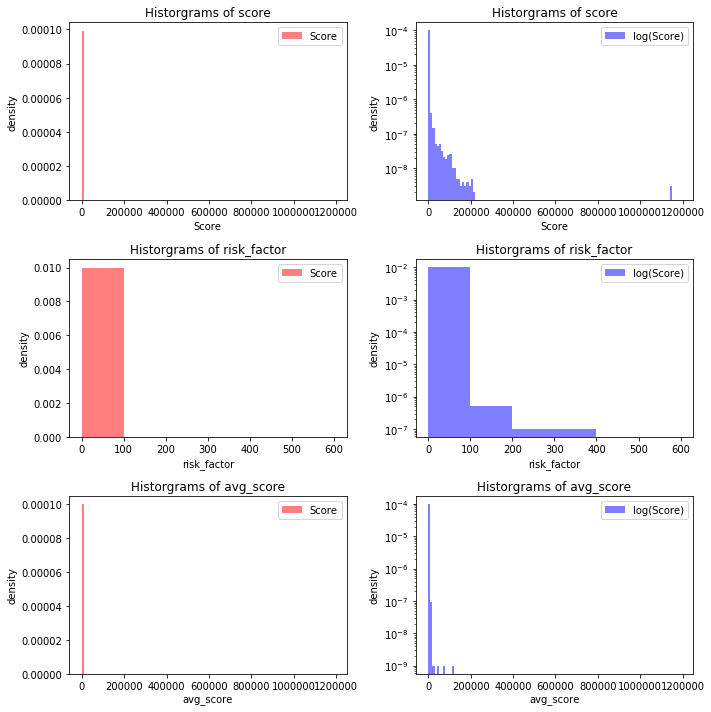

In [17]:
# check the feature distribution
fig, axes = plt.subplots(3,2,figsize=(10, 10))

# Score
axes[0, 0].hist(new_data['score'].values, bins=range(0, 1200000, 10000), alpha=0.5, color='r', label='Score', normed=True)
axes[0, 0].legend(loc='upper right')
axes[0, 0].set_title('Historgrams of score')
axes[0, 0].set_xlabel('Score')
axes[0, 0].set_ylabel('density')

#log scale of score to the large variation
axes[0, 1].hist(new_data['score'].values, log=True, bins=range(0, 1200000, 10000), alpha=0.5, color='b', label='log(Score)', normed=True)
axes[0, 1].legend(loc='upper right')
axes[0, 1].set_title('Historgrams of score')
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('density')


# Risk_factor
axes[1, 0].hist(new_data['risk_factor'].values, bins=range(0, 700, 100), alpha=0.5, color='r', label='Score', normed=True)
axes[1, 0].legend(loc='upper right')
axes[1, 0].set_title('Historgrams of risk_factor')
axes[1, 0].set_xlabel('risk_factor')
axes[1, 0].set_ylabel('density')

#log scale of risk_factor to the large variation
axes[1, 1].hist(new_data['risk_factor'].values, log=True, bins=range(0, 700, 100), alpha=0.5, color='b', label='log(Score)', normed=True)
axes[1, 1].legend(loc='upper right')
axes[1, 1].set_title('Historgrams of risk_factor')
axes[1, 1].set_xlabel('risk_factor')
axes[1, 1].set_ylabel('density')

# Avg_score
axes[2, 0].hist(new_data['avg_score'].values, bins=range(0, 1200000, 10000), alpha=0.5, color='r', label='Score', normed=True)
axes[2, 0].legend(loc='upper right')
axes[2, 0].set_title('Historgrams of avg_score')
axes[2, 0].set_xlabel('avg_score')
axes[2, 0].set_ylabel('density')

#log scale of avg_score to the large variation
axes[2, 1].hist(new_data['avg_score'].values, log=True, bins=range(0, 1200000, 10000), alpha=0.5, color='b', label='log(Score)', normed=True)
axes[2, 1].legend(loc='upper right')
axes[2, 1].set_title('Historgrams of avg_score')
axes[2, 1].set_xlabel('avg_score')
axes[2, 1].set_ylabel('density')

plt.tight_layout()


#### Numerical features and categorical features

,score,risk_factor,avg_score,malicious_ord,classification_ord
score,1.000,0.210,0.893,0.021,-0.027
risk_factor,0.210,1.000,0.090,0.137,-0.185
avg_score,0.893,0.090,1.000,0.024,-0.025
malicious_ord,0.021,0.137,0.024,1.000,-0.973
classification_ord,-0.027,-0.185,-0.025,-0.973,1.000


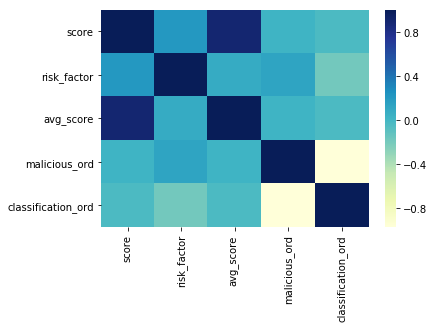

In [18]:
# corrleation of numerical features
## Encoding
new_data['malicious_ord'] = new_data.malicious.astype("category").cat.codes
new_data['classification_ord'] = np.where(new_data['classification'] == 'FP', 1, 0)
encoding_col = ['malicious', 'classification']
new_data = new_data.drop(encoding_col, axis=1)


corr = new_data[["score", "risk_factor", "avg_score", 
                "malicious_ord", "classification_ord"]].corr()

sns.heatmap(corr, cmap='YlGnBu')
corr

### HRU & Alert_type

In [0]:
# plot the number of FP
def plot_number(col, rot=-45, num=None):
  group_by = pd.DataFrame(new_data.groupby([col])['classification_ord'].sum()).sort_values('classification_ord', ascending=False)
  if num:
    group_by = group_by[:num-1]
    sns.barplot(x=group_by.index, y='classification_ord', data=group_by, palette='Set2')
    plt.xticks(rotation=rot)
    plt.xlabel(col)
    plt.ylabel('The number of FP')
    plt.show()
  else:
    sns.barplot(x=group_by.index, y='classification_ord', data=group_by, palette='Set2')
    plt.xticks(rotation=rot)
    plt.xlabel(col)
    plt.ylabel('The number of FP')
    plt.show()

# plot the percentage
def plot_percentage(col, rot=-45, num=None):
  group_by = pd.DataFrame(new_data.groupby([col])['classification_ord'].sum()).sort_index()
  counts = pd.DataFrame(new_data[col].value_counts()).sort_index()
  total = pd.merge(counts, group_by, on=counts.index)
  total['percentage'] = total.apply(lambda x: x['classification_ord'] / x[col], axis=1)
  total = total.sort_values('percentage', ascending=False)
  if num:
    total = total[:num-1]
    sns.barplot(x='key_0', y='percentage', data=total, palette='Set2')
    plt.xticks(rotation=rot)
    plt.xlabel(col)
    plt.ylabel('The Percentage of FP')
    plt.show()
  else:
    sns.barplot(x='key_0', y='percentage', data=total, palette='Set2')
    plt.xticks(rotation=rot)
    plt.xlabel(col)
    plt.ylabel('The Percentage of FP')
    plt.show()

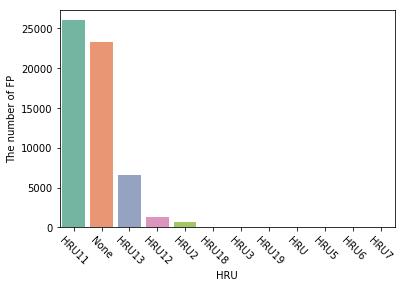

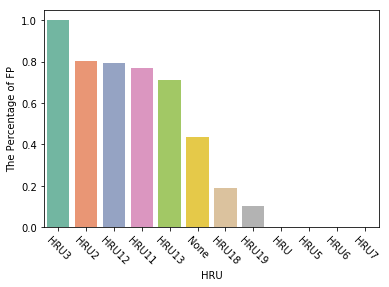

In [20]:
plot_number('HRU')
plot_percentage('HRU')

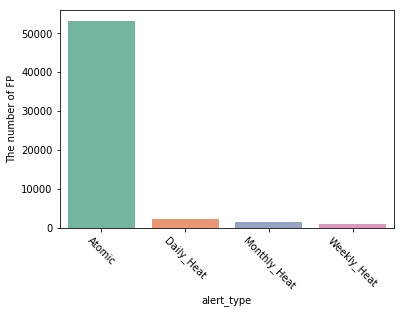

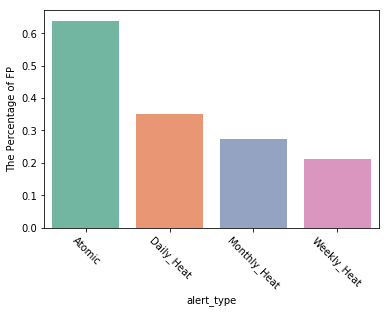

In [21]:
# alert type
plot_number('alert_type')
plot_percentage('alert_type')

### Country & State

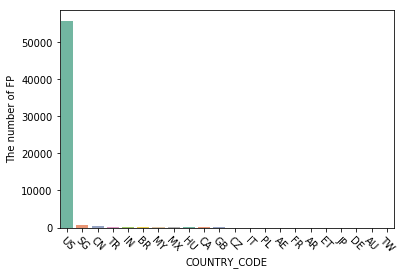

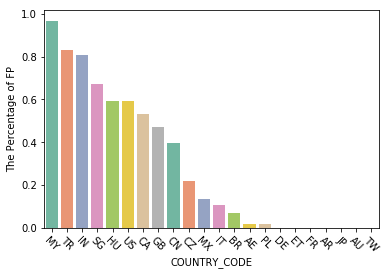

In [22]:
plot_number('COUNTRY_CODE')
plot_percentage('COUNTRY_CODE')


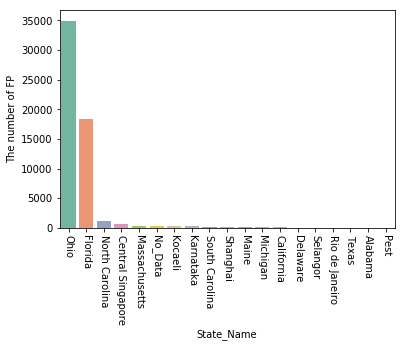

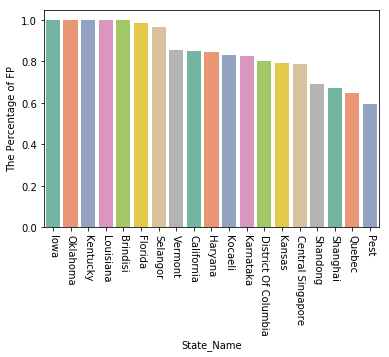

In [23]:
# State
plot_number('State_Name', -90, 20)
plot_percentage('State_Name', -90, 20)

### Business Segment

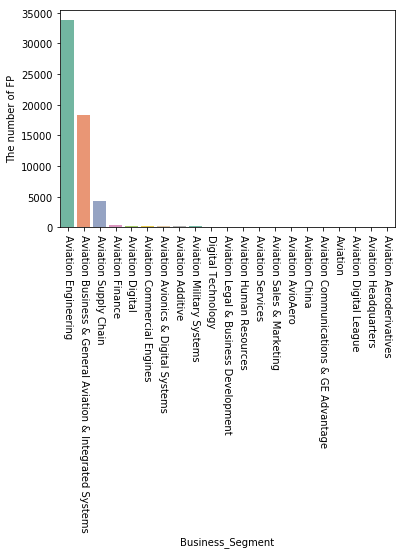

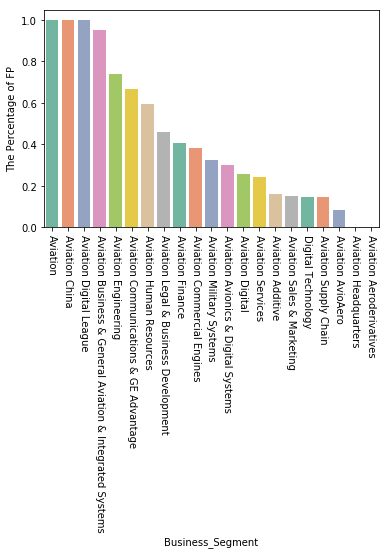

In [24]:
plot_number('Business_Segment', -90)
plot_percentage('Business_Segment', -90)

In [25]:
group_by_bs = pd.DataFrame(new_data.groupby(['Business_Segment'])['classification_ord'].sum()).sort_index()
counts = pd.DataFrame(new_data['Business_Segment'].value_counts()).sort_index()
total = pd.merge(counts, group_by_bs, on=counts.index)
total['percentage'] = total.apply(lambda x: x['classification_ord'] / x['Business_Segment'], axis=1)
total = total.sort_values('percentage', ascending=False)
total.loc[total['percentage'] >= 0.5]

,key_0,Business_Segment,classification_ord,percentage
0,Aviation,4,4,1.000
6,Aviation China,8,8,1.000
10,Aviation Digital League,2,2,1.000
5,Aviation Business & General Aviation & Integra...,19342,18388,0.951
11,Aviation Engineering,45777,33814,0.739
8,Aviation Communications & GE Advantage,12,8,0.667
14,Aviation Human Resources,81,48,0.593


### Function_group & Career_band

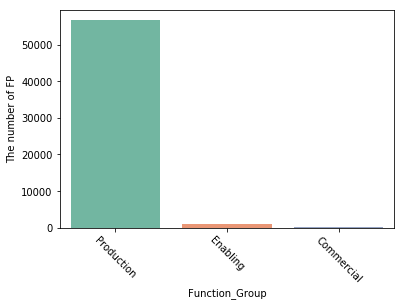

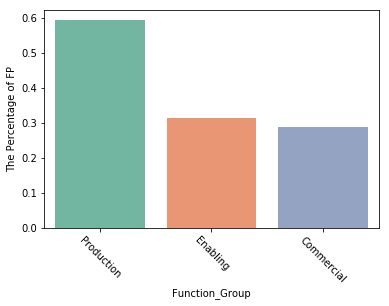

In [26]:
plot_number('Function_Group')
plot_percentage('Function_Group')

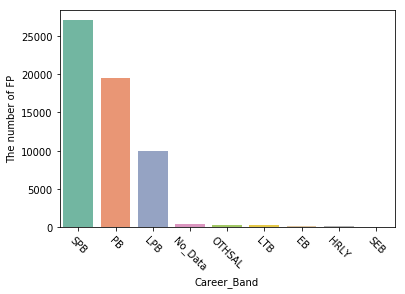

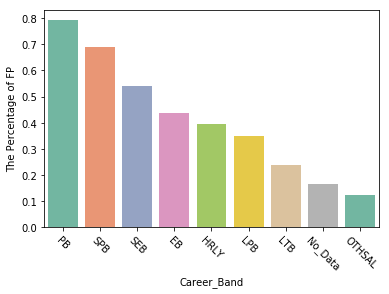

In [27]:
plot_number('Career_Band')
plot_percentage('Career_Band')

HB = Hourly Band

APB = Associate Professional Band

PB = Professional Band

LPB = Lead Professional Band

SPB = Senior Professional Band

EB = Executive Band

Salary differs so as benififits according to your band.

GE offers good salary packages and benefits.

### Employee_id

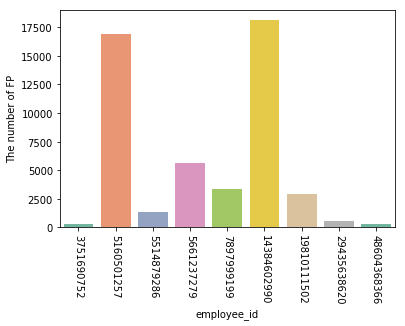

In [28]:
plot_number('employee_id', -90, 10)

# Part 2: Feature Preprocessing

In [29]:
new_data.dtypes

alert_escalation_date     object
alert_id_fk                int64
insert_date               object
score                      int64
status                    object
resolution                object
owner_name                object
employee_id                int64
risk_factor              float64
avg_score                float64
HRU                       object
indicator_pairs           object
alert_type                object
State_Name                object
COUNTRY_CODE              object
Business_Segment          object
Function_Group            object
Career_Band               object
malicious_ord               int8
classification_ord         int64
dtype: object

In [0]:
# Drop some useless columns
to_drop = ['alert_escalation_date', 'alert_id_fk', 'insert_date',
           'status', 'resolution', 'owner_name', 'avg_score',
]
my_data_prep = new_data.drop(to_drop, axis=1)

In [31]:
my_data_prep.dtypes

score                   int64
employee_id             int64
risk_factor           float64
HRU                    object
indicator_pairs        object
alert_type             object
State_Name             object
COUNTRY_CODE           object
Business_Segment       object
Function_Group         object
Career_Band            object
malicious_ord            int8
classification_ord      int64
dtype: object

In [0]:
# Covert indiactor_pairs into dummy variables
indicators = df_indicator.unique().tolist()
d_indicators = pd.DataFrame()
for ind in indicators:
  ind_list = []
  for i in range(my_data_prep.shape[0]):
    if ind in my_data_prep['indicator_pairs'].iloc[i]:
      ind_list.append(1)
    else:
      ind_list.append(0)
  d_indicators[ind] = pd.Series(ind_list).values


In [0]:
new_data = my_data_prep.drop(['indicator_pairs'], axis=1)
X = new_data.drop("classification_ord", axis=1)
y = new_data['classification_ord']

In [0]:
# scaling and encoding
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical = X.dtypes == object
numeric = ['score']
ct = make_column_transformer((OneHotEncoder(), categorical),
                             (StandardScaler(), numeric))


In [0]:
X = pd.DataFrame(ct.fit_transform(X).toarray())

In [0]:
X = pd.concat([X, d_indicators], axis = 1)

In [37]:
print("Dataset size: %d  number of features: %d  number of classes: %d"
      % (X.shape[0], X.shape[1], len(np.unique(y))))

Dataset size: 99463  number of features: 240  number of classes: 2


# Part 3: Model Training and Result Evaluation

### Part 3.1: Split dataset

In [38]:
# Splite data into training and testing
from sklearn import model_selection

# stratifed sampling
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify = y)

print('training data has %d observation with %d features'% X_train.shape)
print('test data has %d observation with %d features'% X_test.shape)

training data has 74597 observation with 240 features
test data has 24866 observation with 240 features


### Part 3.2: Model Training and Selection

In [0]:
# build models
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

# Logistic Regression
classifier_logistic = LogisticRegression()

# Random Forest
classifier_RF = RandomForestClassifier()

### Part 3.3: Use Grid Search to Find Optimal Hyperparameters

In [0]:
from sklearn.model_selection import GridSearchCV

# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: %0.3f" % gs.best_score_)
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

#### Part 3.3.1: Find Optimal Hyperparameters - LogisticRegression

In [41]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2
# C is the lambda value(weight) for L1 and L2
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(),parameters, cv=5)
Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': (1, 5, 10), 'penalty': ('l1', 'l2')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
# the best hyperparameter combination
print_grid_search_metrics(Grid_LR)

Best score: 0.871
Best parameters set:
	C: 10
	penalty: 'l1'


In [0]:
# best model
best_LR_model = Grid_LR.best_estimator_

#### Part 3.3.2: Find Optimal Hyperparameters: Random Forest

In [44]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [45]:
# best number of tress
print_grid_search_metrics(Grid_RF)

Best score: 0.895
Best parameters set:
	n_estimators: 60


In [0]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

### Part 3.4: Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

class of interest as positive

TP: correctly labeled real churn

Precision(PPV, positive predictive value): tp / (tp + fp);
Total number of true predictive churn divided by the total number of predictive churn;
High Precision means low fp, not many return users were predicted as churn users. 


Recall(sensitivity, hit rate, true positive rate): tp / (tp + fn)
Predict most postive or churn user correctly. High recall means low fn, not many churn users were predicted as return users.

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]
    fp = cm[0][1]
    fn = cm[1][0]
    tp = cm[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print (classifier)
    print ("Accuracy is: %0.3f" % accuracy)
    print ("precision is: %0.3f" % precision)
    print ("recall is: %0.3f" % recall)

# print out confusion matrices
def draw_confusion_matrices(confusion_matricies):
    class_names = ['FP','TP']
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1]
        cal_evaluation(classifier, cm)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, interpolation='nearest',cmap=plt.get_cmap('Blues'))
        plt.title('Confusion matrix for %s \n' % classifier )
        fig.colorbar(cax)
        ax.set_xticklabels([''] + class_names)
        ax.set_yticklabels([''] + class_names)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()

Random Forest
Accuracy is: 0.897
precision is: 0.875
recall is: 0.959


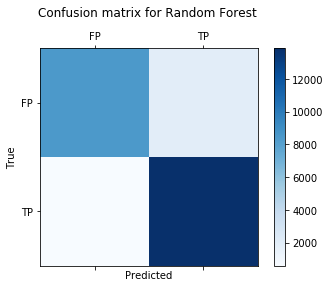

Logistic Regression
Accuracy is: 0.872
precision is: 0.867
recall is: 0.922


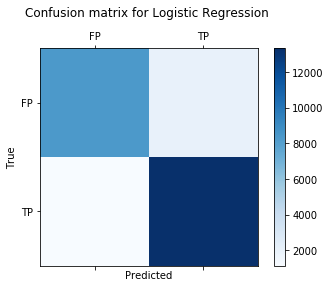

In [48]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
]

draw_confusion_matrices(confusion_matrices)

# Part 4: Feature Selection

### Part 4.1:  Logistic Regression Model - Feature Selection Discussion 



In [49]:
# add L1 regularization to logistic regression
# check the coef for feature selection
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.1)
LRmodel_l1.fit(X, y)
LRmodel_l1.coef_[0]
print ("Logistic Regression (L1) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l1.coef_[0]), \
                      my_data_prep.columns[:-1]), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L1) Coefficients
Career_Band: -2.4069
HRU: 1.2585
malicious_ord: -0.6518
Business_Segment: -0.5288
employee_id: -0.3662
State_Name: 0.2228
COUNTRY_CODE: 0.0
Function_Group: 0.0
alert_type: 0.0
indicator_pairs: 0.0
risk_factor: 0.0
score: 0.0


In [50]:
# add L2 regularization to logistic regression
# check the coef for feature selection
LRmodel_l2 = LogisticRegression(penalty="l2", C = 5)
LRmodel_l2.fit(X, y)
LRmodel_l2.coef_[0]
print ("Logistic Regression (L2) Coefficients")
for k,v in sorted(zip(map(lambda x: round(x, 4), LRmodel_l2.coef_[0]), \
                      my_data_prep.columns[:-1]), key=lambda k_v:(-abs(k_v[0]),k_v[1])):
    print (v + ": " + str(k))

Logistic Regression (L2) Coefficients
Career_Band: -4.5406
COUNTRY_CODE: 4.2131
score: -2.0128
Function_Group: -1.8758
HRU: 1.4994
alert_type: 1.4621
Business_Segment: -1.4035
State_Name: 1.0212
risk_factor: 0.8558
malicious_ord: -0.3016
indicator_pairs: 0.1484
employee_id: -0.049


Part 4.2: Random Forest Model - Feature Importance Discussion

In [51]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

importance_dict = {}
# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for k,v in sorted(zip(map(lambda x: round(x, 4), importances), my_data_prep.columns[:-1]), reverse=True):
    print (v + ": " + str(k))
    importance_dict[v] = k*10

Feature importance ranking by Random Forest Model:
employee_id: 0.0383
malicious_ord: 0.0292
HRU: 0.028
State_Name: 0.0051
risk_factor: 0.0043
Career_Band: 0.0015
Business_Segment: 0.0005
indicator_pairs: 0.0003
alert_type: 0.0001
score: 0.0
Function_Group: 0.0
COUNTRY_CODE: 0.0


Text(0.5, 1.0, 'Feature Importance of RF')

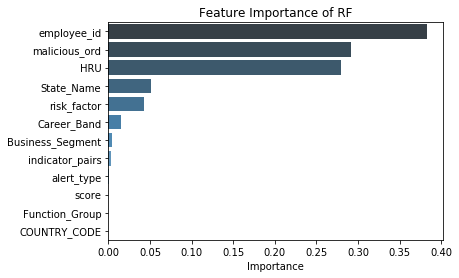

In [52]:
df = pd.DataFrame.from_dict(importance_dict, orient='index', columns=['Importance'])
sns.barplot(x='Importance', y=df.index, data=df,
             palette="Blues_d")
plt.title('Feature Importance of RF')